In [1]:
# pandas常用模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import randn

# 使用ipython效果会更好，会打开对话窗口，显示效果更好。而jupyter上只是一个截图

## Figure和Subplot

In [2]:
fig=plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

<Figure size 432x288 with 0 Axes>

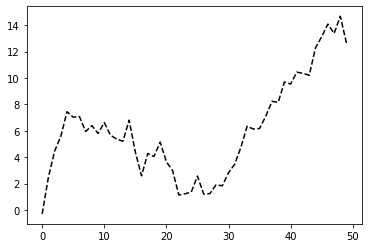

In [5]:
plt.plot(randn(50).cumsum(), 'k--')

In [7]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [9]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

### Subplots生成多个figure

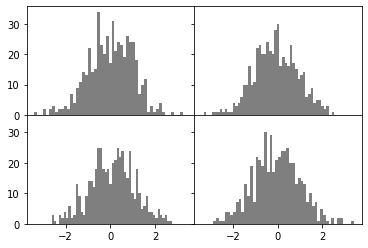

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

# 同行图形共Y轴
plt.subplots_adjust(wspace=0, hspace=0)

### 图形绘制

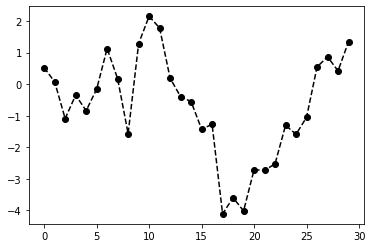

In [14]:
plt.plot(randn(30).cumsum(), 'ko--')

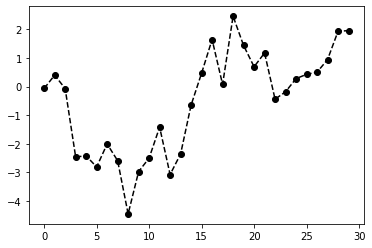

In [16]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

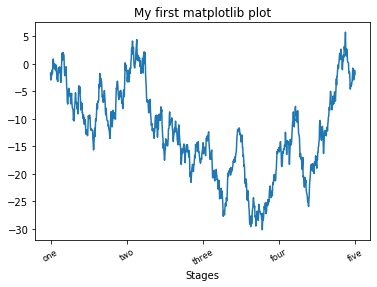

In [31]:
# 设置标题，轴标签，刻度以及刻度标签
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(randn(1000).cumsum())

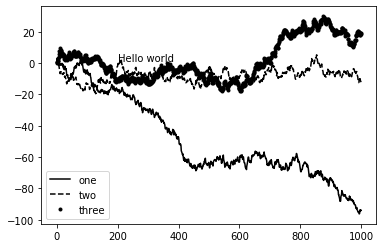

In [37]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.text(200, 1, 'Hello world')
ax.legend()


Text(0.5, 1.0, 'Import dates in 2018-2019 financial crisis')

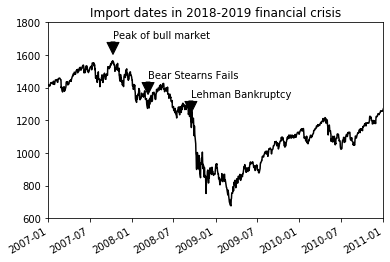

In [45]:
# 注解以及在Subplo上绘图

# 2008~2009年金融危机期间的重要日期
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

df = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = df['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),    
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')        
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top'
               )

# 放大到2007~2010
ax.set_xlim(['2007-01-01', '2011-01-01'])
ax.set_ylim([600, 1800])

ax.set_title("Import dates in 2018-2019 financial crisis")

## pandas的绘图函数

pandas封装了matlab绘图，使绘图更加容易方便。

### 线形图

In [2]:
s = pd.Series(randn(10).cumsum(), index=np.arange(0, 100, 10))

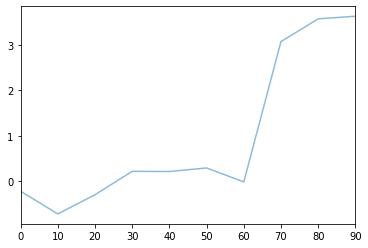

In [7]:
# 透明度0.5
s.plot(alpha=0.5)

In [55]:
df = pd.DataFrame(randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10)
                 )

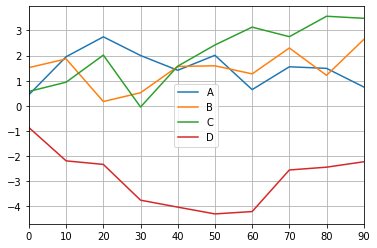

In [59]:
df.plot(grid=True)

### 柱状图

In [61]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

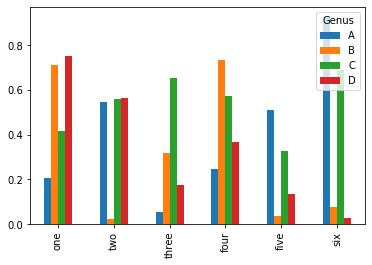

In [66]:
df.plot(kind='bar')

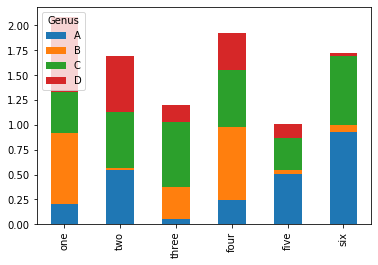

In [67]:
df.plot(kind='bar', stacked=True)

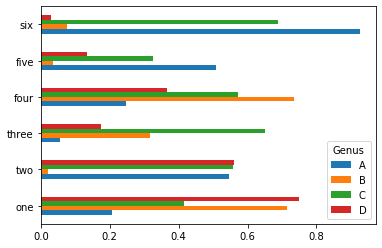

In [64]:
df.plot(kind='barh')

### 直方图和密度图

In [70]:
df = pd.read_csv('tips.csv')
df.head(10)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [72]:
df['tip_pct'] = df['tip'] / df['total_bill']
df.head(10)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240
6,8.77,2.00,No,Sun,Dinner,2,0.228050
7,26.88,3.12,No,Sun,Dinner,4,0.116071
8,15.04,1.96,No,Sun,Dinner,2,0.130319
9,14.78,3.23,No,Sun,Dinner,2,0.218539


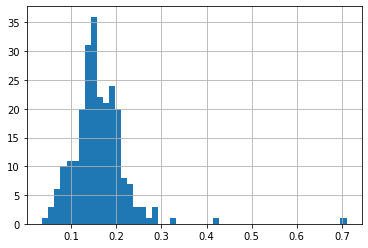

In [73]:
# 直方统计图函数 使用hist
df['tip_pct'].hist(bins=50)

In [75]:
# 统计分析函数
df['tip_pct'].describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_pct, dtype: float64

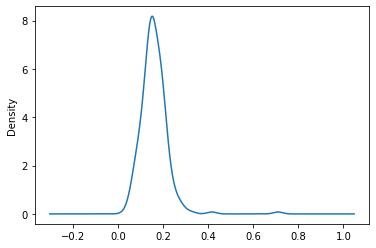

In [74]:
df['tip_pct'].plot(kind='kde')

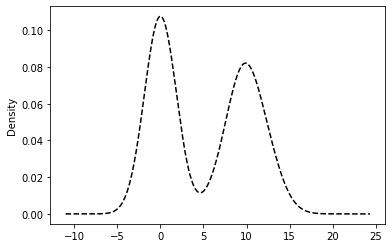

In [79]:
# 两个由不同的标准正态分布组成的双峰分布

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.plot(kind='kde', style='k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab9c240>,
      dtype=object)

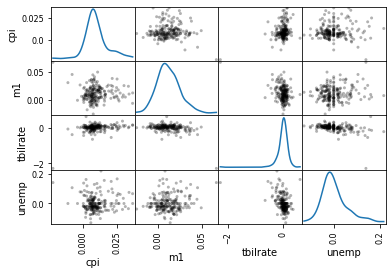

In [91]:
### 散点图
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)